In [1]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

ModuleNotFoundError: No module named 'pydub'

In [2]:
# Load the sound file
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')

In [3]:
wav_bells = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano = wav_piano.astype(np.double)

In [4]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)

Text(0,0.5,'freq (Hz)')

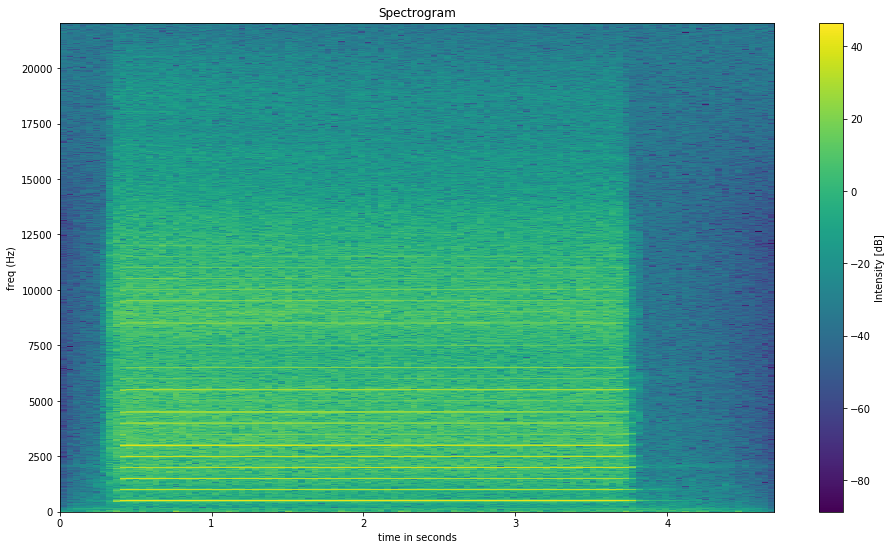

In [5]:
plt.figure(figsize=(16,9))
pxx, freq_guitar2, time_guitar2, cax = plt.specgram(wav_guitar, Fs=44100, NFFT=2048)
plt.colorbar(cax).set_label('Intensity [dB]')
plt.gca().set_aspect('auto')
plt.title('Spectrogram')
plt.xlabel('time in seconds')
plt.ylabel('freq (Hz)')


Text(0,0.5,'freq (Hz)')

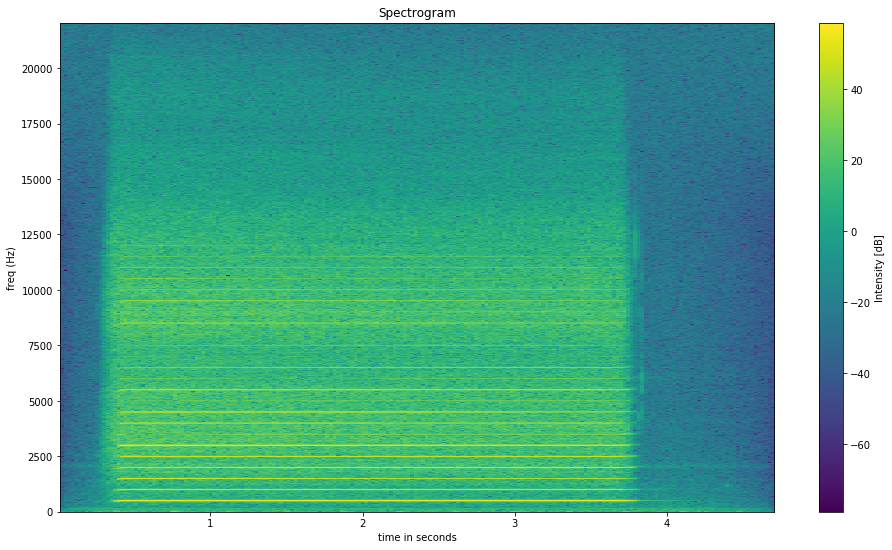

In [6]:
plt.figure(figsize=(16,9))
cmap = plt.get_cmap('viridis')
cmap.set_under(color='k', alpha=None)
NFFT = 2048
vmin = -20



pxx, freq_guitar2, time_guitar2, cax = plt.specgram(wav_guitar, Fs=44100, mode='magnitude', 
                                                    NFFT=NFFT, noverlap=NFFT/2)#, vmin=vmin, cmap=cmap)
plt.colorbar(cax).set_label('Intensity [dB]')
plt.gca().set_aspect('auto')
plt.title('Spectrogram')
plt.xlabel('Time (sec)')
plt.ylabel('Freq (Hz)')



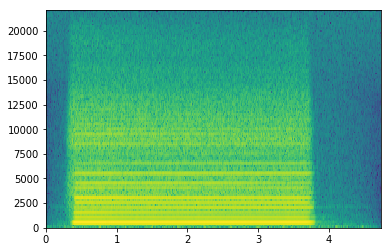

In [7]:
pxx, freq_guitar2, time_guitar2, cax = plt.specgram(wav_guitar, Fs=44100, scale_by_freq=True)

In [217]:
fs_guitar

44100

In [216]:
wav_guitar.shape

(208593,)

In [181]:
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=8192*2)

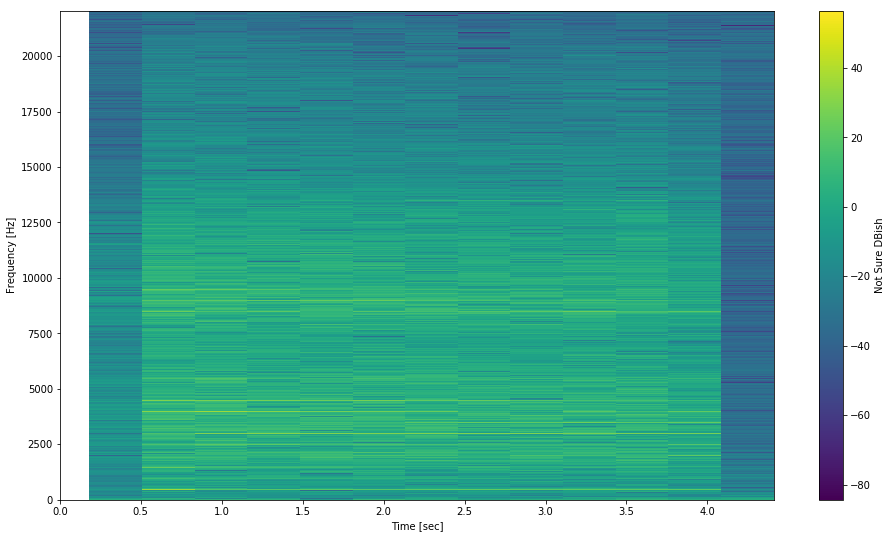

In [182]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_guitar, freq_guitar, 10*np.log10(spectrogram_guitar))
#plt.imshow(spectrogram_guitar)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_guitar[-1])
#plt.ylim(0,1500)
plt.colorbar().set_label('Not Sure DBish')
#colors.LogNorm(vmin = , vmax = 1)
plt.gca().set_aspect('auto')
plt.show()

In [190]:
arg_max = spectrogram_guitar.argmax(axis=0)

In [189]:
freq_guitar[186]

500.64697265625

In [208]:
arg_part = np.argpartition(spectrogram_guitar, -2, axis=0)

In [209]:
arg_sort = np.argsort(spectrogram_guitar, axis=0)

In [191]:
for m in arg_max:
    print(freq_guitar[m])

29.608154296875
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
500.64697265625
5.38330078125
2.691650390625


In [203]:
arg_max

array([ 11, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,   2,
         1])

In [205]:
arg_part

array([[4952, 4279, 4045, ..., 5192, 7363, 5853],
       [8192, 8192, 8192, ..., 8192, 4096, 8192],
       [8191, 8191, 8191, ..., 8191, 8191, 8191],
       ...,
       [  13,  185,  185, ...,  185,    1,    3],
       [  56, 1115, 1115, ...,  187,    3,    4],
       [  11,  186,  186, ...,  186,    2,    1]])

In [206]:
for a,b,c in zip(arg_part[-3], arg_part[-2], arg_part[-1]):
    print(freq_guitar[[a,b,c]])

[ 34.99145508 150.73242188  29.6081543 ]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[   8.07495117 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[1001.29394531 3001.19018555  500.64697266]
[2503.23486328 3001.19018555  500.64697266]
[ 497.95532227 3001.19018555  500.64697266]
[497.95532227 503.33862305 500.64697266]
[2.69165039 8.07495117 5.38330078]
[ 8.07495117 10.76660156  2.69165039]


In [194]:
for a in arg_part[1]:
    print(freq_guitar[a])

0.0
34.991455078125
21.533203125
8.074951171875
10.7666015625
13.458251953125
16.14990234375
18.841552734375
5.38330078125
24.224853515625
26.91650390625
29.608154296875
32.2998046875
2.691650390625


In [210]:
arg_sort

array([[6758, 7407, 8185, ..., 8027, 3346, 4743],
       [8150, 7966, 8175, ..., 7509, 1095, 5672],
       [6161, 8110, 6907, ..., 7520, 2515, 4555],
       ...,
       [  12,  185,  185, ...,  185,    1,    2],
       [  56, 1115, 1115, ...,  187,    3,    4],
       [  11,  186,  186, ...,  186,    2,    1]])

In [215]:
for x in zip(*arg_sort[-5:]):
    print(freq_guitar[list(x)])

[ 34.99145508  40.37475586  32.29980469 150.73242188  29.6081543 ]
[ 495.26367188 1501.94091797  497.95532227 3001.19018555  500.64697266]
[1499.24926758 2500.54321289  497.95532227 3001.19018555  500.64697266]
[1001.29394531 2500.54321289  497.95532227 3001.19018555  500.64697266]
[1001.29394531 2500.54321289  497.95532227 3001.19018555  500.64697266]
[1001.29394531 2500.54321289  497.95532227 3001.19018555  500.64697266]
[2002.58789062 1001.29394531  497.95532227 3001.19018555  500.64697266]
[2002.58789062 1001.29394531  497.95532227 3001.19018555  500.64697266]
[2002.58789062  497.95532227 1001.29394531 3001.19018555  500.64697266]
[3003.88183594 2002.58789062 1001.29394531 3001.19018555  500.64697266]
[2500.54321289 1001.29394531  497.95532227 3001.19018555  500.64697266]
[3003.88183594 2002.58789062  497.95532227  503.33862305  500.64697266]
[16.14990234 10.76660156  2.69165039  8.07495117  5.38330078]
[29.6081543   8.07495117  5.38330078 10.76660156  2.69165039]


In [120]:
time_guitar.shape

(14,)

In [121]:
spectrogram_guitar.shape

(8193, 14)

In [122]:
spectrogram_guitar.argmax(axis=0)

array([ 11, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,   2,
         1])

In [125]:
freq_guitar[186]

500.64697265625

In [102]:
spectrogram_guitar[2606]

IndexError: index 2606 is out of bounds for axis 0 with size 513

In [14]:
spectrogram_guitar[2606].argmax()

2

In [15]:
spectrogram_guitar[2606, 2]

3.163759497229648

In [16]:
freq_guitar.size

8193

In [17]:
freq_guitar.max()

22050.0

In [18]:
spectrogram_guitar.max(axis = 1)

array([7.90372222e+00, 1.24930225e+02, 8.61100323e+01, ...,
       1.26471771e-03, 4.28560939e-03, 4.16133445e-03])

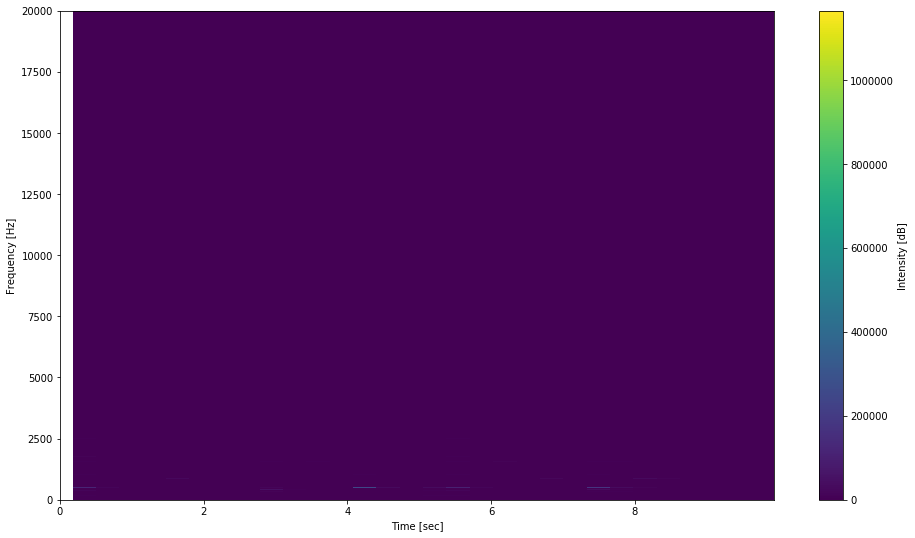

In [19]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_piano, freq_piano, spectrogram_piano)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_piano[-1])
plt.ylim(0,20000)
plt.colorbar().set_label('Intensity [dB]')
plt.gca().set_aspect('auto')
plt.show()

In [218]:
wav_piano.shape

(449519,)

In [230]:
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=8192*2, noverlap=8192)

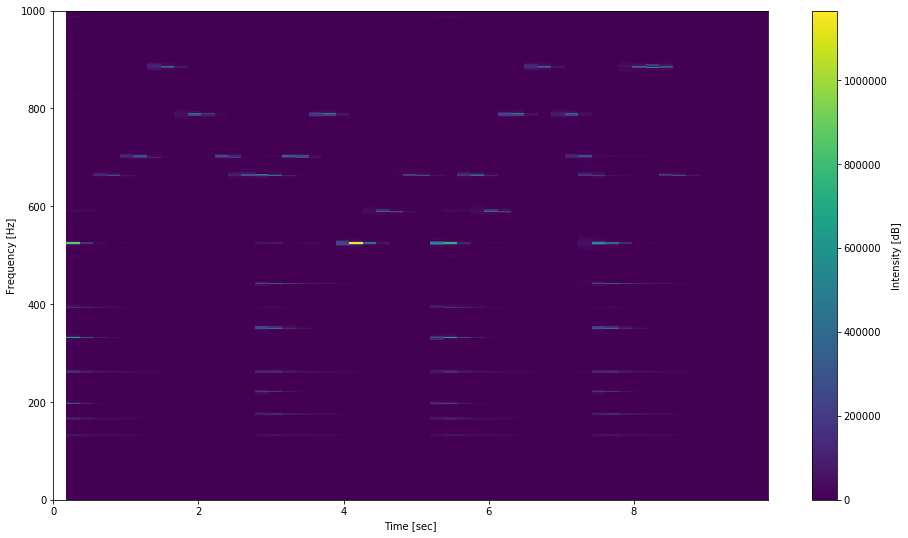

In [231]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_piano, freq_piano, (spectrogram_piano))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_piano[-1])
plt.ylim(0,1000)
plt.colorbar().set_label('Intensity [dB]')
plt.gca().set_aspect('auto')
plt.show()

In [232]:
spectrogram_piano.shape

(8193, 53)

In [225]:
freq_piano[:10]

array([ 0.        ,  2.69165039,  5.38330078,  8.07495117, 10.76660156,
       13.45825195, 16.14990234, 18.84155273, 21.53320312, 24.22485352])

In [256]:
def note_position(a):
    notes = {'A':9, 'A#':10, 'B':11, 'C':0, 'C#':1, 'D':2, 
             'D#':3, 'E':4, 'F':5, 'F#':6, 'G':7, 'G#':8}
    note = notes[a[:-1]]
    scale = int(a[-1])
    return note + scale*12

In [257]:
def note_distance(a, b):
    return note_position(b)-note_position(a)

In [263]:
def frequencies(start, stop, A4=440):
    a = 2**(1/12)
    return a ** np.arange(note_distance('A4', start), note_distance('A4', stop)) * A4
def note_names(start, stop):
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
    
    note = notes.index(start[:-1])
    scale = int(start[-1])
    
    stop_note = notes.index(stop[:-1])
    stop_scale = int(stop[-1])
    
    output = []
    
    while scale < stop_scale or (scale == stop_scale and note < stop_note):
        output.append(notes[note] + str(scale))
        note += 1
        if note >= len(notes):
            note = 0
            scale += 1
        
    return output

In [270]:
arg_sort = np.argsort(spectrogram_piano, axis=0)

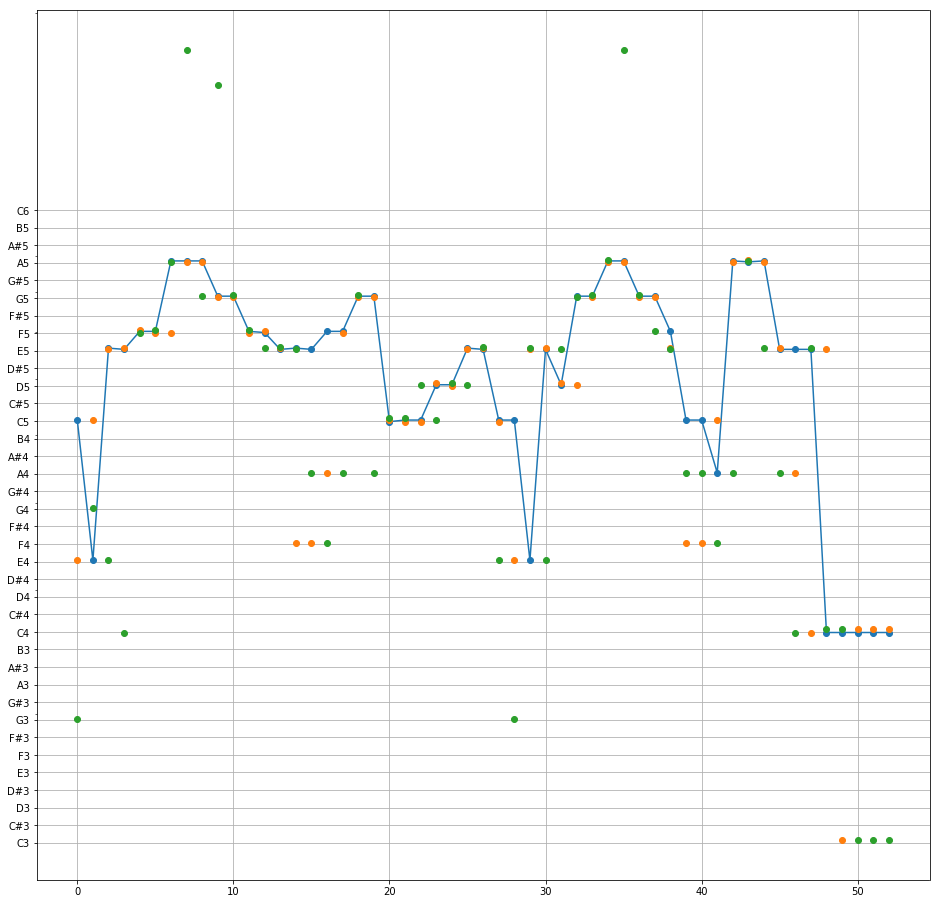

In [285]:
plt.figure(figsize=(16,16))
plt.plot(freq_piano[spectrogram_piano.argmax(axis=0)], 'o-')
plt.plot(freq_piano[arg_sort[-2]], 'o')
plt.plot(freq_piano[arg_sort[-3]], 'o')
# plt.plot(freq_piano[arg_sort[-4]], 'o')
plt.gca().set_yscale("log")
plt.yticks(frequencies('C3', 'C#6'),
           note_names('C3', 'C#6'))
plt.gca().grid(True)
plt.gca().set_aspect('auto')


In [234]:
for i,frq in enumerate(spectrogram_piano.argmax(axis=0)):
    print(spectrogram_piano[frq*2,i])#[frq*2-2:frq*2+4,i])

23292.189526294253
8886.250808277004
13266.866094521098
965.7826013281543
11918.53193030367
26672.41616466056
8718.23214010686
6084.516373539508
760.9625878042641
13541.148710879479
3942.3914442858777
20511.732279461816
452.3409735932202
350.1138107422752
6123.803864652186
1387.3394278805208
16580.215710751643
16339.73350869844
13699.991066296629
9485.889648117232
1567.3723185731073
24759.00009976563
4937.319439210306
18269.519759796593
8797.109846458916
15417.875471073525
1603.2660691091944
17861.761690434716
19713.302329569273
176012.9751738138
526.4330566747838
17576.074027587296
14112.526880416557
9119.737907189732
9615.095392671903
5651.044543719724
8286.809666844967
13363.29884251042
23993.368065966726
20286.67017295465
11210.538313712643
23421.905616797605
7462.344197655245
212.40363017266975
6340.800458324622
1370.3127315427791
178.9658726409447
0.5318835812900712
5.751389013438576
1.232151343407563
0.18495503517983686
0.007941882050417327
0.0018001384829212143


In [235]:
spectrogram_piano.max(axis=0)

array([8.69069199e+05, 2.75782623e+05, 1.46439959e+05, 2.43708299e+05,
       1.31259775e+05, 2.91024219e+05, 1.21493006e+05, 4.19586984e+05,
       7.87916652e+04, 4.27919160e+05, 1.72964173e+05, 2.56849120e+05,
       1.90370592e+05, 3.09425383e+05, 4.98587984e+05, 4.34136269e+05,
       3.31305219e+05, 2.57216968e+05, 2.28773517e+05, 4.68733310e+05,
       2.51791343e+05, 1.16508037e+06, 4.20620850e+05, 3.55938563e+05,
       2.51815174e+05, 2.35626026e+05, 2.81707096e+05, 5.33414545e+05,
       7.50898132e+05, 2.45099484e+05, 3.97103133e+05, 3.95246716e+05,
       2.80302264e+05, 4.76254668e+05, 1.59631486e+05, 4.30094867e+05,
       8.70383498e+04, 3.56153582e+05, 2.70917226e+05, 5.64332801e+05,
       4.08227808e+05, 1.89825242e+05, 3.98322059e+05, 5.53249316e+05,
       3.17961780e+05, 2.70427735e+05, 6.00920025e+04, 5.19155889e+03,
       1.88079249e+02, 1.97439065e+01, 1.72086732e+00, 1.64856150e-01,
       1.60716962e-02])

In [143]:
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=2048)

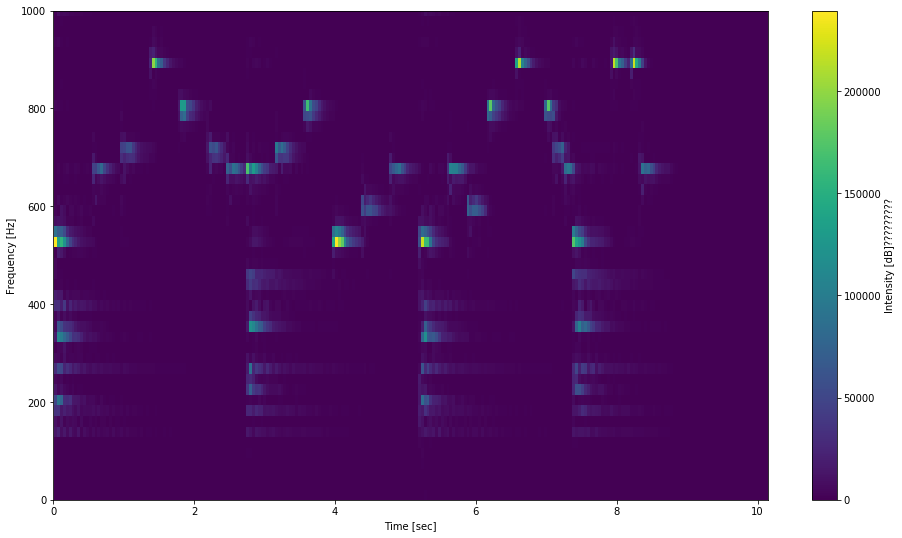

In [144]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_piano, freq_piano, spectrogram_piano)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_piano[-1])
plt.ylim(0,1000)
plt.colorbar().set_label('Intensity [dB]?????????')
plt.gca().set_aspect('auto')
plt.show()

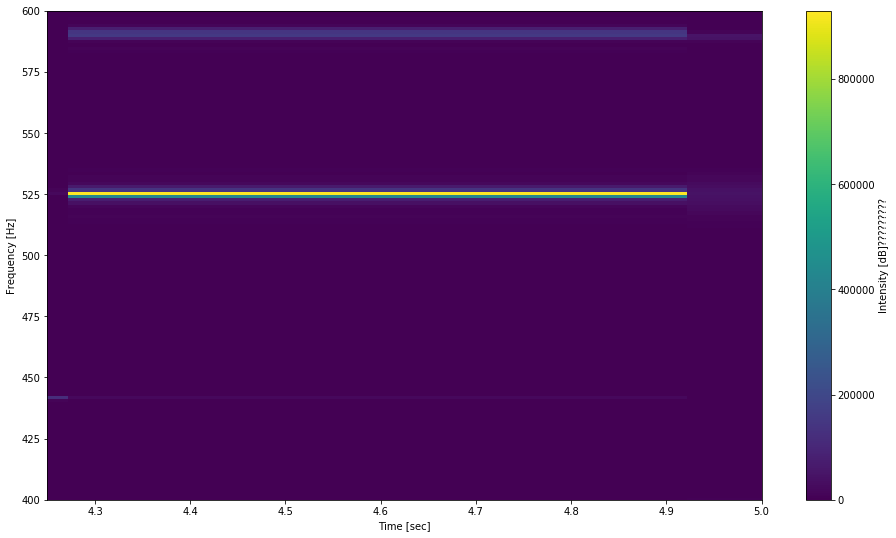

In [42]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_piano, freq_piano, spectrogram_piano)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(4.25,5)
plt.ylim(400,600)
plt.colorbar().set_label('Intensity [dB]?????????')
plt.gca().set_aspect('auto')
plt.show()

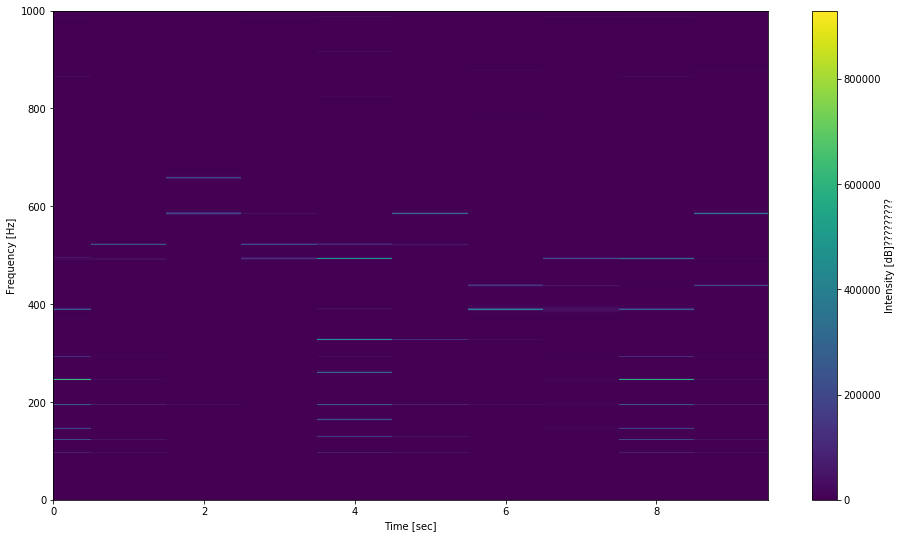

In [48]:
plt.figure(figsize=(16,9))
plt.imshow(spectrogram_piano)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_piano[-1])
plt.ylim(0,1000)
plt.colorbar().set_label('Intensity [dB]?????????')
plt.gca().set_aspect('auto')
plt.show()

In [286]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=2048)

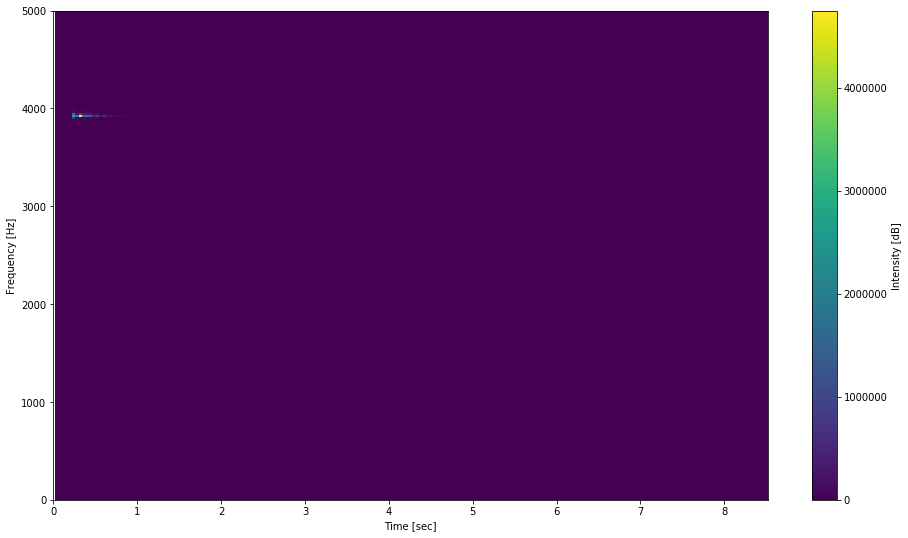

In [287]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_bells, freq_bells, spectrogram_bells)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_bells[-1])
plt.ylim(0,5000)
plt.colorbar().set_label('Intensity [dB]')
plt.gca().set_aspect('auto')
plt.show()

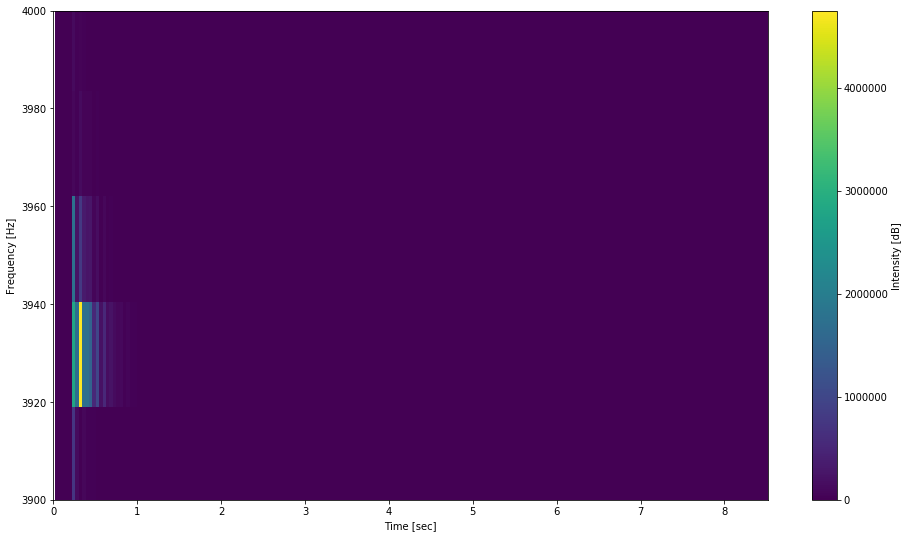

In [288]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_bells, freq_bells, spectrogram_bells)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_bells[-1])
plt.ylim(3900,4000)
plt.colorbar().set_label('Intensity [dB]')
plt.gca().set_aspect('auto')
plt.show()

In [57]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=65536)

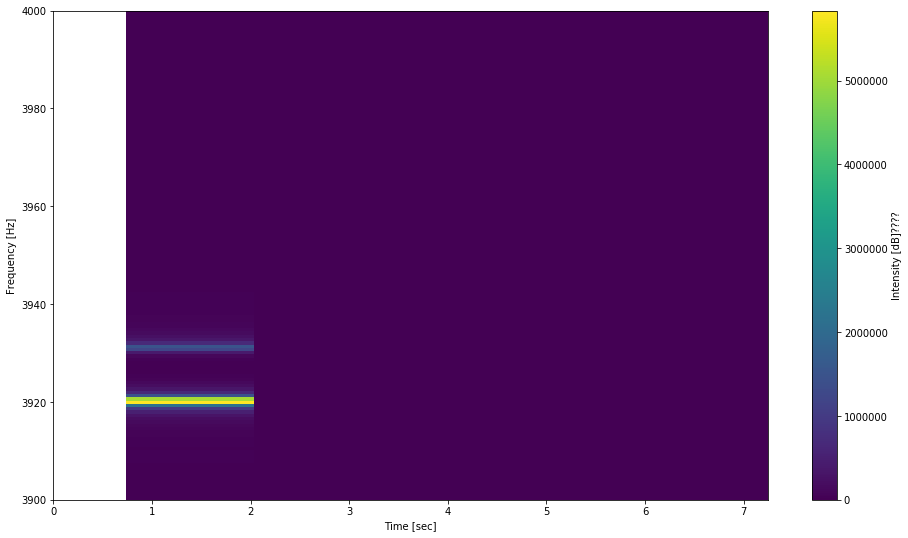

In [60]:
plt.figure(figsize=(16,9))
plt.pcolormesh(time_bells, freq_bells, spectrogram_bells)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0,time_bells[-1])
plt.ylim(3900,4000)
plt.colorbar().set_label('Intensity [dB]????')
plt.gca().set_aspect('auto')
plt.show()

In [61]:
freq_bells.argmax()

32768

In [62]:
freq_bells[32768]

22050.0

In [74]:
np.min(freq_bells)

0.0

In [76]:
(freq_guitar).argmin()

0

In [77]:
spectrogram_guitar.argmax()

2606

In [81]:
max(spectrogram_guitar[2606])

3.163759497229648

In [84]:
spectrogram_guitar[:,3].argmax()

186

In [86]:
spectrogram_guitar[(3,6,12,24),0]

array([0.2598554 , 0.80037086, 2.72012253, 0.95502801])